In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
#Generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 110ms/step - loss: 1.3061 - accuracy: 0.5972 - val_loss: 0.6359 - val_accuracy: 0.6530
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5630 - accuracy: 0.7135 - val_loss: 0.5157 - val_accuracy: 0.7300
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4756 - accuracy: 0.7727 - val_loss: 0.5696 - val_accuracy: 0.7046
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4154 - accuracy: 0.8116 - val_loss: 0.4557 - val_accuracy: 0.7992
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3641 - accuracy: 0.8395 - val_loss: 0.5432 - val_accuracy: 0.7634
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2946 - accuracy: 0.8709 - val_loss: 0.4359 - val_accuracy: 0.8198
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2330 - accuracy: 0.9028 - val_loss: 1.0877 - val_ac

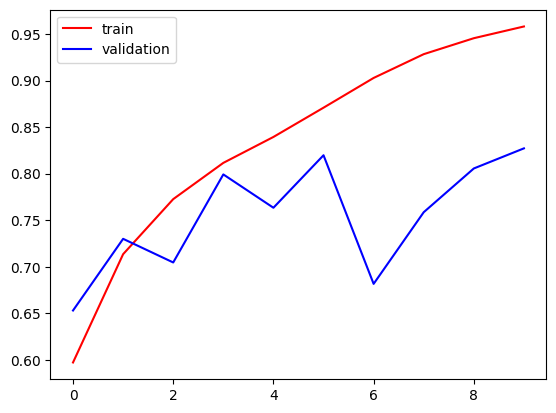

In [ ]:
 import matplotlib.pyplot as plt
 plt.plot(history.history['accuracy'],color='red',label='train')
 plt.plot(history.history['val_accuracy'],color='blue',label='validation')
 plt.legend()
 plt.show()

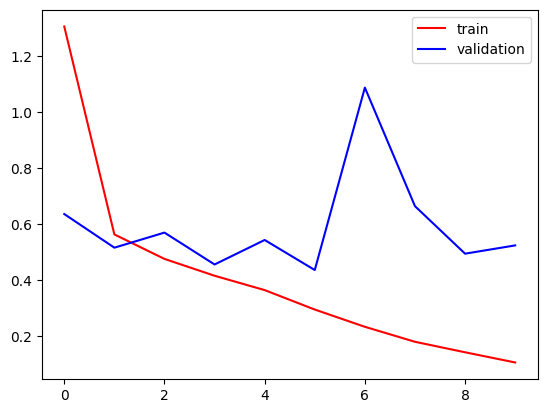

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting
#1. Add more data
#2. Data Augmentation
#3. L1/L2 Regularizer
#4. Dropout - used for this model
#5. Batch Normalization - used for this model
#6. Reduce complexity

In [ ]:
# Prediction

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/img_dog.jpg')

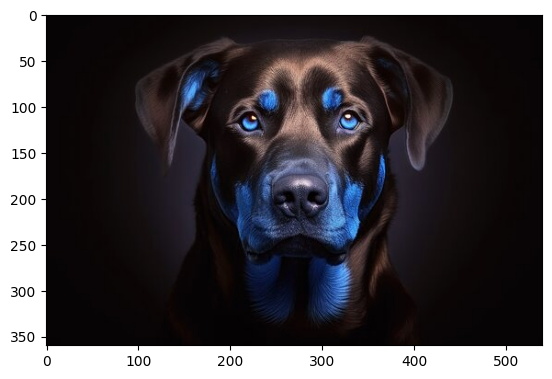

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(360, 540, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
test_img_1 = cv2.imread('/content/img_cat.jpeg')

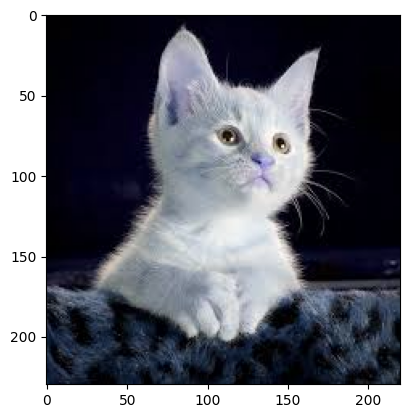

In [ ]:
plt.imshow(test_img_1)

In [ ]:
test_img_1.shape

(230, 220, 3)

In [ ]:
test_img_1 = cv2.resize(test_img_1,(256,256))

In [ ]:
test_input_1 = test_img_1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input_1)

1/1 [==============================] - 0s 34ms/step


array([[0.]], dtype=float32)